In [6]:
!pip install numpy==1.19.4 pandas tabulate matplotlib   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

In [2]:
# Data untuk pH dan TDS
data_pH = {
    "Kategori pH": ["Rendah", "Normal", "Tinggi"],
    "Persentase Nilai (pH)": ["<5.5", "5.5-6.5", ">6.5"]
}
data_TDS = {
    "Kategori TDS": ["Rendah", "Normal", "Tinggi"],
    "Konsentrasi Nilai (ppm)": ["<1050", "1050-1400", ">1400"]
}

In [ ]:
# Membuat DataFrame
df_kelembaban = pd.DataFrame(data_pH)
df_ammonia = pd.DataFrame(data_TDS)
# Menampilkan tabel dengan tabulate
print(tabulate(df_kelembaban, headers='keys', tablefmt='grid'))
print()
print(tabulate(df_ammonia, headers='keys', tablefmt='grid'))

+----+---------------+-------------------------+
|    | Kategori pH   | Persentase Nilai (pH)   |
+====+===============+=========================+
|  0 | Rendah        | <5.5                    |
+----+---------------+-------------------------+
|  1 | Normal        | 5.5-6.5                 |
+----+---------------+-------------------------+
|  2 | Tinggi        | >6.5                    |
+----+---------------+-------------------------+

+----+----------------+---------------------------+
|    | Kategori TDS   | Konsentrasi Nilai (ppm)   |
+====+================+===========================+
|  0 | Rendah         | <1050                     |
+----+----------------+---------------------------+
|  1 | Normal         | 1050-1400                 |
+----+----------------+---------------------------+
|  2 | Tinggi         | >1400                     |
+----+----------------+---------------------------+


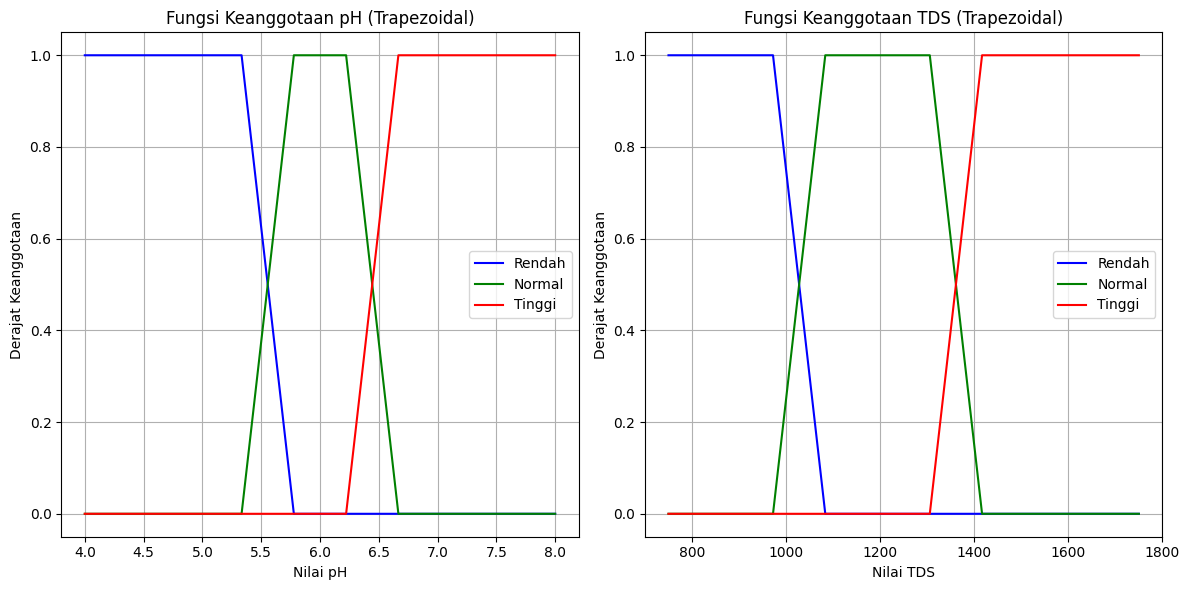

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# # Fungsi Keanggotaan Trapezoidal
# def trapezoidal_function(x, a, b, c, d):
#     """Menghitung derajat keanggotaan trapezoidal."""
#     return np.where((x < a) | (x > d), 0, 
#                     np.where((x >= a) & (x < b), (x - a) / (b - a), 
#                              np.where((x >= b) & (x <= c), 1, 
#                                       np.where((x > c) & (x < d), (d - x) / (d - c), 0))))
    
# Fungsi Keanggotaan Trapezoidal
def trapezoidal_function(x, a, b, c, d):
    """Menghitung derajat keanggotaan trapezoidal."""
    if x < a or x > d:
        return 0
    elif x >= a and x < b:
        return (x - a) / (b - a)
    elif x > c and x < d:
        return (d - x) / (d - c)
    elif x >= b and x <= c: 
        return 1    

# Menentukan parameter fungsi keanggotaan untuk pH
# a, b, c, d untuk rendah, normal, tinggi
a_rendah_ph, b_rendah_ph, c_rendah_ph, d_rendah_ph = 0, 0, 5.5, 5.5
a_normal_ph, b_normal_ph, c_normal_ph, d_normal_ph = 5.5, 5.5, 6.5, 6.5
a_tinggi_ph, b_tinggi_ph, c_tinggi_ph, d_tinggi_ph = 6.5, 6.5, 14.0, 14.0  # Memperpanjang ke d=8.0

# Menentukan parameter fungsi keanggotaan untuk TDS
# a, b, c, d untuk rendah, normal, tinggi
a_rendah_tds, b_rendah_tds, c_rendah_tds, d_rendah_tds = 0, 0, 1050, 1050
a_normal_tds, b_normal_tds, c_normal_tds, d_normal_tds = 1050, 1050, 1400, 1400
a_tinggi_tds, b_tinggi_tds, c_tinggi_tds, d_tinggi_tds = 1400, 1400, 2000, 2000  # Memperpanjang ke d=2000

# Membuat rentang nilai untuk pH dan TDS
ph_values = np.linspace(4, 8.0, 10)
tds_values = np.linspace(750, 1750, 10)

# Menghitung fungsi keanggotaan
mu_rendah_ph = [trapezoidal_function(i, a_rendah_ph, b_rendah_ph, c_rendah_ph, d_rendah_ph) for i in ph_values]
mu_normal_ph = [trapezoidal_function(i, a_normal_ph, b_normal_ph, c_normal_ph, d_normal_ph) for i in ph_values]
mu_tinggi_ph = [trapezoidal_function(i, a_tinggi_ph, b_tinggi_ph, c_tinggi_ph, d_tinggi_ph) for i in ph_values]

mu_rendah_tds = [trapezoidal_function(i, a_rendah_tds, b_rendah_tds, c_rendah_tds, d_rendah_tds) for i in tds_values]
mu_normal_tds = [trapezoidal_function(i, a_normal_tds, b_normal_tds, c_normal_tds, d_normal_tds) for i in tds_values]
mu_tinggi_tds = [trapezoidal_function(i, a_tinggi_tds, b_tinggi_tds, c_tinggi_tds, d_tinggi_tds) for i in tds_values]

# Plotting fungsi keanggotaan untuk pH
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ph_values, mu_rendah_ph, label='Rendah', color='blue')
plt.plot(ph_values, mu_normal_ph, label='Normal', color='green')
plt.plot(ph_values, mu_tinggi_ph, label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan pH (Trapezoidal)')
plt.xlabel('Nilai pH')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid()

# Plotting fungsi keanggotaan untuk TDS
plt.subplot(1, 2, 2)
plt.plot(tds_values, mu_rendah_tds, label='Rendah', color='blue')
plt.plot(tds_values, mu_normal_tds, label='Normal', color='green')
plt.plot(tds_values, mu_tinggi_tds, label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan TDS (Trapezoidal)')
plt.xlabel('Nilai TDS')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
